<a href="https://colab.research.google.com/github/dhianaslv/machine-learning/blob/main/linear_regression/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

 Y = Θ₀ + Θ₁ * X₁ 


### Conceito

A regressão é utilizada para prever dados contínuos e possui duas variáveis.
 
* **Variável dependente:** Objetivo final representado por Y.

* **Variáveis independentes:** Dados utilizados para prever Y representado por X.

#### Tipos de Regressão Linear

* **Regressão Simples:** É quando **uma variável** independente é utilizada para estimar uma variável dependente.

* **Regressão Múltipla:** É quando **mais de uma variável** independente é utilizada para estimar uma variável dependente.

### Projeto

No projeto a seguir construiremos um modelo de Regressão Linear dos casos de COVID-19 no estado de Alagoas.

### Dados para o treinamento

Os dados para a contrução do modelo foram retirados do site [Covid Saúde](https://covid.saude.gov.br/). Baixei o arquivo CSV e fiz uma seleção dos dados apenas do estado de Alagoas usando o [Text Editor](https://texteditor.co/).

O modelo foi construido com os dados do **dia 25 de Fevereiro de 2020** até o **dia 25 de Fevereiro de 2021**. 80% foi utilizado para o treinamento do modelo e 20% para o teste.

### Mão na massa

In [ ]:
# Importação das bibliotecas necessárias 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# Lendo o conjunto de dados
database = pd.read_csv("https://raw.githubusercontent.com/dhianaslv/maching-learning/main/linear_regression/covid19-data.csv")

database.head(5)

,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,2020-02-25,9,3337357,0,0,0,0
1,2020-02-26,9,3337357,0,0,0,0
2,2020-02-27,9,3337357,0,0,0,0
3,2020-02-28,9,3337357,0,0,0,0
4,2020-02-29,9,3337357,0,0,0,0


In [ ]:
# Seleção das características
 
features = database[['casosAcumulado','casosNovos','obitosAcumulado','obitosNovos']]
features.head(5)

,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [ ]:
# Separação dos dados de treinamento e os de teste

msk = np.random.rand(len(database)) < 0.8
train = features[msk]
test = features[~msk]

In [ ]:
# Construção do modelo

model = linear_model.LinearRegression()

# Variável independente
train_x = np.asanyarray(train[['casosAcumulado']]) 

#Variável dependente
train_y = np.asanyarray(train[['obitosAcumulado']])  

In [ ]:
#Treinamento

model.fit(train_x, train_y) 

# Coeficientes da equação linear
print ('Inclinação da linha de ajuste: ', model.coef_)
print ('Ponto de intersecção: ', model.intercept_)

Inclinação da linha de ajuste:  [[0.02297951]]
Ponto de intersecção:  [105.0535054]


#### Linha de ajuste
É a linha que dará a melhor estimativa para os dados referentes a pontos desconhecidos.

Text(0.5, 1.0, 'Gráfico do treinamento')

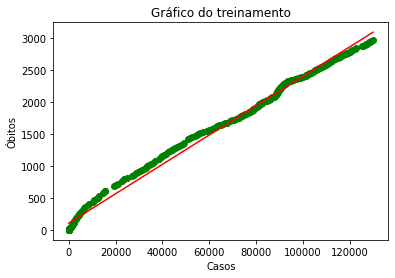

In [ ]:
# Plot do gráfico de treinamento

plt.scatter(train.casosAcumulado, train.obitosAcumulado,  color='green')
plt.plot(train_x, model.intercept_[0] + model.coef_[0][0]*train_x, 'red')
plt.xlabel("Casos")
plt.ylabel("Óbitos")
plt.title("Gráfico do treinamento")

In [ ]:
# Testes

test_x = np.asanyarray(test[['casosAcumulado']])
test_y = np.asanyarray(test[['obitosAcumulado']])

# Predição

prediction = model.predict(test_x)

Text(0.5, 1.0, 'Gráfico do teste')

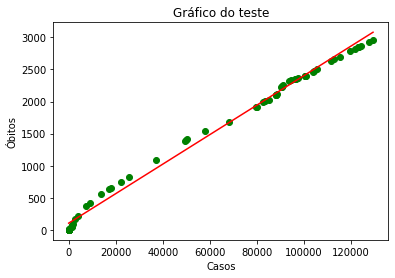

In [ ]:
# Plot do gráfico de testes

plt.scatter(test.casosAcumulado, test.obitosAcumulado,  color='green')
plt.plot(test_x, model.intercept_[0] + model.coef_[0][0]*test_x, 'red')
plt.xlabel("Casos")
plt.ylabel("Óbitos")
plt.title("Gráfico do teste")

In [ ]:
# Precisão

print("Erro Médio Absoluto: %.2f" % mean_absolute_error(test_y, prediction))
print("Erro Médio Quadrático: %.2f" % mean_squared_error(test_y, prediction))
print("Desempenho do modelo: %.2f" % r2_score(test_y , prediction) )

Erro Médio Absoluto: 72.12
Erro Médio Quadrático: 6953.43
Desempenho do modelo: 0.99


* **Erro Médio Absoluto:** É a média do valor absoluto dos erros.

* **Erro Médio Quadrático:** É a média da diferença quadrática entre cada ponto previsto e o ponto real.

* **R2 score:** É uma métrica popular para medir o desempenho do modelo. Ela representa o quão próximos os pontos de dados estão da linha de regressão ajustada. Quanto mais alto o seu valor, melhor o modelo se ajusta aos seus dados. A melhor pontuação possível é 1,0 e pode ser negativa.